## Data Preprocessing

Preprocessing of the dataset is crucial for improving the model performance

#### Data Augumentation

Increase the diversity in the training data set so that model do not overfits

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dir = "/kaggle/input/fer2013/train"
test_dir = "/kaggle/input/fer2013/test"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # rescaling the pixels in the range between 1 and 0
    width_shift_range=0.1, # shifting width randomly by 20%
    height_shift_range=0.1, # shifting height randomly by 20%
    # zoom_range=0.2, # zooming the picture by 20%
    horizontal_flip=True, # allowing horizontal flip
    validation_split=0.2, # setting the 20% data for validation
    # rotation_range=20, # rotate the image by 20 degree
    fill_mode='nearest'
)

In [5]:
test_datagen = ImageDataGenerator(
    rescale = 1./255, # rescaling the pixels in the range between 1 and 0
    validation_split = 0.2 # seting the 20% data for validation
)

In [6]:
train_gen = train_datagen.flow_from_directory(
    directory=train_dir, # containing the training data
    target_size=(48, 48), # pixel size of image 48x48
    color_mode='grayscale', # converts the image to grayscale
    class_mode='categorical', # classifying the image
    batch_size=32, # no. of images per batch
    shuffle=True, # allowing the shuffling of the image
    subset="training" # uses the training subset of the data
)

Found 22968 images belonging to 7 classes.


In [7]:
test_gen = test_datagen.flow_from_directory(
    directory=test_dir, # containing the training data
    target_size=(48, 48), # pixel size of image 48x48
    color_mode='grayscale', # converts the image to grayscale
    class_mode='categorical', # classifying the image
    batch_size=32, # no. of images per batch
    shuffle=True, # allowing the shuffling of the image
    subset="validation" # uses the training subset of the data
)

Found 1432 images belonging to 7 classes.


## Modeling

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from keras import regularizers
from tensorflow.keras.optimizers import Adam

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,496,903 (17.15 MB)

 Trainable params: 4,492,935 (17.14 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [12]:
model.compile(loss="categorical_crossentropy", optimizer= Adam(learning_rate=0.0001), metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [14]:
callbacks = [ModelCheckpoint(
    filepath='model_weights.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)]

In [15]:
history = model.fit(
    train_gen,
    #steps_per_epoch=train_gen.samples // train_gen.batch_size,
    epochs=50,
    validation_data=test_gen,
    #validation_steps=test_gen.samples // test_gen.batch_size,
    callbacks=callbacks
)

Epoch 1/50


I0000 00:00:1734078371.208867     108 service.cc:145] XLA service 0x7f1a2c0073e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734078371.208924     108 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734078371.208929     108 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  3/718 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.1528 - loss: 10.1020  

I0000 00:00:1734078384.978418     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.1790 - loss: 9.5156
Epoch 1: val_accuracy improved from -inf to 0.26257, saving model to model_weights.weights.h5
718/718 ━━━━━━━━━━━━━━━━━━━━ 119s 140ms/step - accuracy: 0.1790 - loss: 9.5145 - val_accuracy: 0.2626 - val_loss: 8.3703
Epoch 2/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2307 - loss: 8.0847
Epoch 2: val_accuracy improved from 0.26257 to 0.29679, saving model to model_weights.weights.h5
718/718 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.2307 - loss: 8.0837 - val_accuracy: 0.2968 - val_loss: 6.7995
Epoch 3/50
716/718 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2651 - loss: 6.6450
Epoch 3: val_accuracy improved from 0.29679 to 0.30587, saving model to model_weights.weights.h5
718/718 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.2651 - loss: 6.6435 - val_accuracy: 0.3059 - val_loss: 5.5368
Epoch 4/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3027 - loss: 5.3215
Epoch 4: val_ac

In [16]:
train_loss, train_acc = model.evaluate(train_gen)
test_loss, test_acc   = model.evaluate(test_gen)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7070 - loss: 1.2298
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6754 - loss: 1.3562
final train accuracy = 70.26 , validation accuracy = 66.13


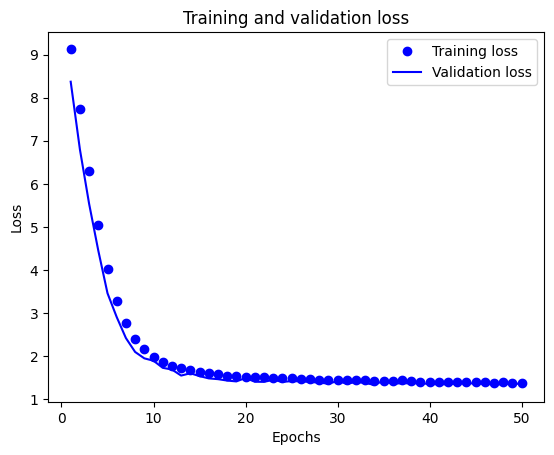

In [17]:
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


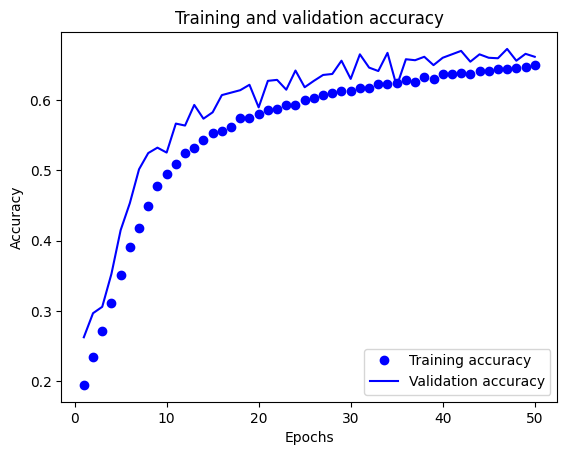

In [18]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


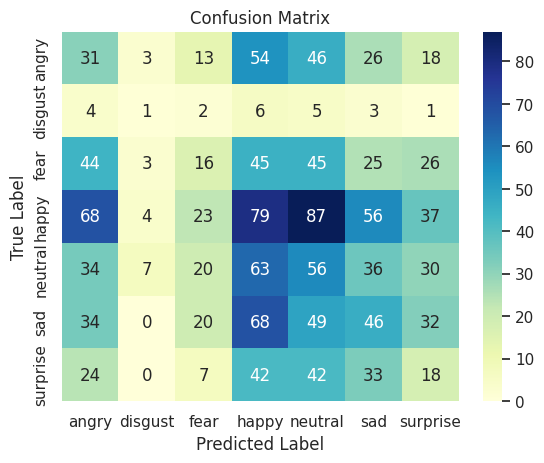

In [19]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = test_gen.classes
validation_pred_probs = model.predict(test_gen)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_gen.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()